<a href="https://colab.research.google.com/github/cristhiansito123/mai_hand/blob/main/scripts/preprocessing/Preprocessing_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Llamar base de datos para preprocesar los datos a entrenar


In [2]:
import json
import requests
import os
import shutil
import time
import sys

import numpy as np
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [4]:
train_path = '/content/drive/MyDrive/signal_language/asl_dataset'


In [5]:
import os
from PIL import Image
data = []
for i in range(10):
  images_folder = train_path+'/'+str(i)+'/'
  image_files = os.listdir(images_folder)

  for image_file in image_files:
      if image_file.endswith('.jpeg'):
          image_path = os.path.join(images_folder, image_file)
          image = Image.open(image_path)
          data.append((image, i))

In [6]:
for i in range(ord('a'), ord('z')+1):
  images_folder = train_path+'/'+chr(i)+'/'
  image_files = os.listdir(images_folder)

  for image_file in image_files:
      if image_file.endswith('.jpeg'):
          image_path = os.path.join(images_folder, image_file)
          image = Image.open(image_path)
          data.append((image, chr(i)))

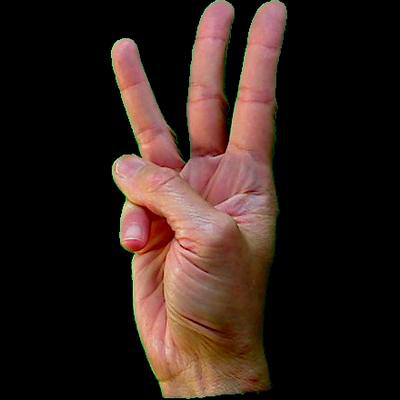

In [7]:
data[2300][0]

In [8]:
from PIL import Image

### Filtrar y guardar los vectores de la iamgen:

In [9]:
np.array(data[0][0])[200][200]

array([125,  66,  62], dtype=uint8)

In [10]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 55.8 MB/s eta 0:00:00


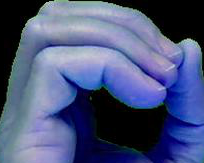

In [11]:
import cv2
import mediapipe as mp
import csv
from google.colab.patches import cv2_imshow

  # Configurar la detección de manos con Mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands


with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.1) as hands:
      # Convertir la imagen de BGR a RGB
      image_rgb = cv2.cvtColor(np.array(data[0][0]), cv2.COLOR_BGR2RGB)
      # Procesar la imagen con Mediapipe
      resultado = hands.process(np.array(data[0][0]))
      # Verificar si se detectó alguna mano

if resultado.multi_hand_landmarks:

      # Obtener los puntos de referencia de la mano
      mano_landmarks = resultado.multi_hand_landmarks[0]

      # Determinar los límites del rectángulo de recorte
      altura, ancho, _ = np.array(data[0][0]).shape
      puntos_x = [punto.x * ancho for punto in mano_landmarks.landmark]
      puntos_y = [punto.y * altura for punto in mano_landmarks.landmark]
      min_x, max_x = int(min(puntos_x)), int(max(puntos_x))
      min_y, max_y = int(min(puntos_y)), int(max(puntos_y))

      # Determinar el factor de expansión del recorte
      factor_expansion = 0.2  # Ajusta este valor según tus necesidades (0.2 es solo un ejemplo)

      # Calcular los valores de expansión
      expansion_x = int((max_x - min_x) * factor_expansion)
      expansion_y = int((max_y - min_y) * factor_expansion)

      # Ajustar los límites del recorte
      min_x -= expansion_x
      max_x += expansion_x
      min_y -= expansion_y
      max_y += expansion_y

      # Asegurarse de que los límites no excedan las dimensiones de la imagen
      min_x = max(0, min_x)
      max_x = min(ancho - 1, max_x)
      min_y = max(0, min_y)
      max_y = min(altura - 1, max_y)

      # Recortar la imagen alrededor de la mano con los nuevos límites
      imagen_recortada = np.array(data[0][0])[min_y:max_y, min_x:max_x]
      cv2_imshow(imagen_recortada)

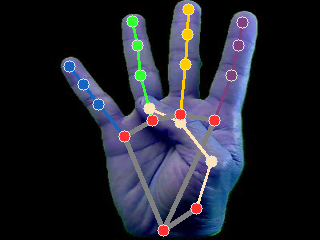

In [48]:
import cv2
import mediapipe as mp
import csv
from google.colab.patches import cv2_imshow

   # Configurar la detección de manos con Mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
mp_drawing_styles = mp.solutions.drawing_styles
csv_path = 'landmarks.csv'  # Ruta del archivo CSV
counter =0

with open(csv_path, 'w', newline='') as csv_file1:
    writer1 = csv.writer(csv_file1)
    for i in range(len(data)):
      with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
            # Convertir la imagen de BGR a RGB

            image_rgb = cv2.cvtColor(np.array(data[i][0]), cv2.COLOR_BGR2RGB)

            blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

            # Filtrado para priorizar la mano
            imagen_recortada2 = cv2.resize(np.array(data[i][0]), (320, 240))

            # Procesar la imagen con Mediapipe9
            #resultado = hands.process(np.array(data[i][0]))
            resultado = hands.process(imagen_recortada2)
            # Verificar si se detectó alguna mano

            #cv2_imshow(imagen_recortada2)

                # Guardar los puntos y vectores en un archivo CSV
      if resultado.multi_hand_landmarks:

                    hand_landmarks_cropped = resultado.multi_hand_landmarks[0]
                    landmarks_data = []
                    for landmark in hand_landmarks_cropped.landmark:
                        landmarks_data.append((landmark.x, landmark.y, landmark.z))


                    writer1.writerows(str(data[i][1]))
                    writer1.writerows(landmarks_data)




                    #print(landmarks_data)
                    if(i==300):

                      mp_drawing.draw_landmarks(
                                    imagen_recortada2, hand_landmarks_cropped, mp_hands.HAND_CONNECTIONS,mp_drawing_styles.get_default_hand_landmarks_style(),mp_drawing_styles.get_default_hand_connections_style()
                                )
                      cv2_imshow(imagen_recortada2)
      else:
        #print("No se pudo sacar landmark de la imagen "+str(data[i][1])+" "+str(counter))
        counter = counter + 1
                # Mostrar la imagen final con los vectores y puntos


In [49]:
import shutil
# Ruta de destino en Google Drive
drive_path = '/content/drive/MyDrive/signal_language/asl_dataset'

# Copiar el archivo CSV a Google Drive
shutil.copy('landmarks.csv', drive_path)

print("El archivo CSV se ha guardado en Google Drive.")

El archivo CSV se ha guardado en Google Drive.
